# GBM

In [58]:
import pandas as pd #讀資料
from sklearn import ensemble #做GBM
from sklearn.model_selection import train_test_split #區分資料
import matplotlib.pyplot as plt #畫圖
from sklearn.metrics import classification_report #取得準確性相關數據
from sklearn.grid_search import GridSearchCV #tuning數據

In [11]:
def read_data():
    data = pd.read_csv(input("請輸入資料路徑（不要包含分號）:"))
    return data

In [12]:
#BRAZIL_CITIES_final.csv
data = read_data()

請輸入資料路徑（不要包含分號）:BRAZIL_CITIES_final.csv


In [31]:
#data

In [24]:
#區分x,y資料
feature = data.columns
#feature
feature = list(feature.drop("IDHM_y"))

In [27]:
#區分資料
train_x,test_x,train_y,test_y = train_test_split(data[feature],data["IDHM_y"],test_size = 0.3,random_state=0)
#random.state = 0 ＝ set.seed()

## GBM Model 實作

### 建模

In [14]:
#參數
p = {'n_estimators':100,
     'learning_rate':0.1,
     'min_samples_split':60,
     'min_samples_leaf':10,
     'max_depth':5,
     'subsample':0.8
     
    #subsample
    }

In [47]:
#建模
gbm_model = ensemble.GradientBoostingClassifier(**p)

In [48]:
gbm_model.fit(train_x,train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=10, min_samples_split=60,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

### 看資料重要性

In [49]:

predictior = list(train_x)
feat_importance = pd.Series(gbm_model.feature_importances_,
                            predictior).sort_values(ascending = False)

Text(0,0.5,'Importance')

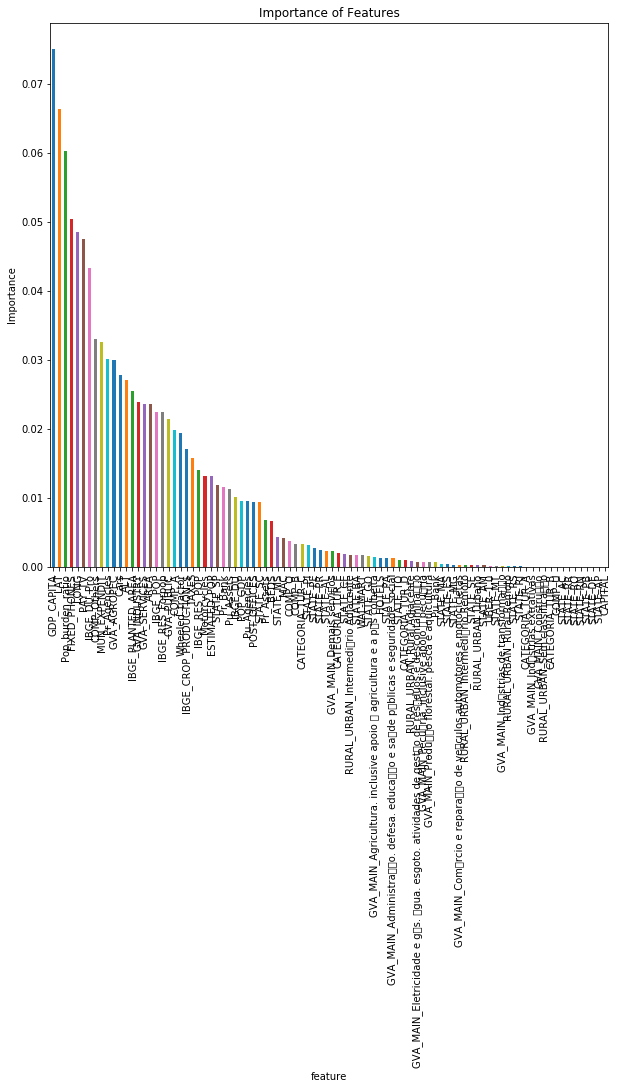

In [51]:
plt.figure(figsize=(10,10))
feat_importance.plot(kind="bar",title="Importance of Features")
plt.xlabel("feature")
plt.ylabel("Importance")

### 看準確度相關數據

In [52]:
acc = gbm_model.score(test_x,test_y)
print("Accuracy of the model:",acc)

Accuracy of the model: 0.8538922155688623


In [55]:
pred = gbm_model.predict(test_x)
print(classification_report(test_y,pred))

             precision    recall  f1-score   support

          0       0.67      0.46      0.54       118
          1       0.86      0.90      0.88       950
          2       0.87      0.87      0.87       586
          3       0.58      0.44      0.50        16

avg / total       0.85      0.85      0.85      1670



## Tuning

### 設置learning rates

In [87]:
#新設計一個空模型
gbm_model1 = ensemble.GradientBoostingClassifier(**p)

In [88]:
#,0.05,0.01,0.005,0.001
#,500,700,1000,1500,1750
# candidate = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
#             'n_estimators':[100,250,500,700,1000,1500,1750]}
#'n_estimators':[500,700,1000],
#              'min_samples_split':[40,60],
#              'min_samples_leaf':[7,9],
#              'subsample':[0.8,0.95,0.1],
#              'max_features':[15,20]
candidate = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001]}

In [89]:
tuning = GridSearchCV(estimator=gbm_model1,param_grid=candidate,scoring='accuracy'
                      ,n_jobs = 4,iid=False,cv = 5)

In [90]:
tuning.fit(train_x,train_y)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.83727, std: 0.00526, params: {'learning_rate': 0.15},
  mean: 0.84446, std: 0.01009, params: {'learning_rate': 0.1},
  mean: 0.83881, std: 0.01081, params: {'learning_rate': 0.05},
  mean: 0.82290, std: 0.01392, params: {'learning_rate': 0.01},
  mean: 0.81366, std: 0.01022, params: {'learning_rate': 0.005},
  mean: 0.74460, std: 0.01750, params: {'learning_rate': 0.001}],
 {'learning_rate': 0.1},
 0.8444576238243883)

### 設置 n_estimators 

In [99]:
candidate = {'n_estimators':[100,250,500,700,1000,1500,1750]}

In [100]:
#改變參數
p['learning_rate']=0.1
gbm_model1 = ensemble.GradientBoostingClassifier(**p)

In [101]:
tuning = GridSearchCV(estimator=gbm_model1,param_grid=candidate,scoring='accuracy'
                      ,n_jobs = 4,iid=False,cv = 5)

In [102]:
tuning.fit(train_x,train_y)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

KeyboardInterrupt: 

### 設置min_samples_split

In [ ]:
candidate = {'min_samples_split':[60,100,200]}

In [ ]:
#改變參數
p
gbm_model1 = ensemble.GradientBoostingClassifier(**p)

In [ ]:
tuning = GridSearchCV(estimator=gbm_model1,param_grid=candidate,scoring='accuracy'
                      ,n_jobs = 4,iid=False,cv = 5)

In [ ]:
tuning.fit(train_x,train_y)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

### 設置min_sample_leaf

In [ ]:
candidate = {'min_samples_leaf':[1,3,5,7,9]}

In [ ]:
#改變參數
p
gbm_model1 = ensemble.GradientBoostingClassifier(**p)

In [ ]:
tuning = GridSearchCV(estimator=gbm_model1,param_grid=candidate,scoring='accuracy'
                      ,n_jobs = 4,iid=False,cv = 5)

In [ ]:
tuning.fix(train_x,train_y)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

###  設置subsample

In [ ]:
candidate = {'subsample':[0.8,0.95,0.1]}

In [ ]:
#改變參數
p
gbm_model1 = ensemble.GradientBoostingClassifier(**p)

In [ ]:
tuning = GridSearchCV(estimator=gbm_model1,param_grid=candidate,scoring='accuracy'
                      ,n_jobs = 4,iid=False,cv = 5)

In [ ]:
tuning.fix(train_x,train_y)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_